In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
keras.utils.set_random_seed(23)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [ ]:
M = keras.Sequential([keras.Input(shape=(input_dim,)),
 keras.layers.Dense(800, activation='relu'),
 keras.layers.Dense(num_classes, activation='softmax')])
M.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


In [ ]:
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

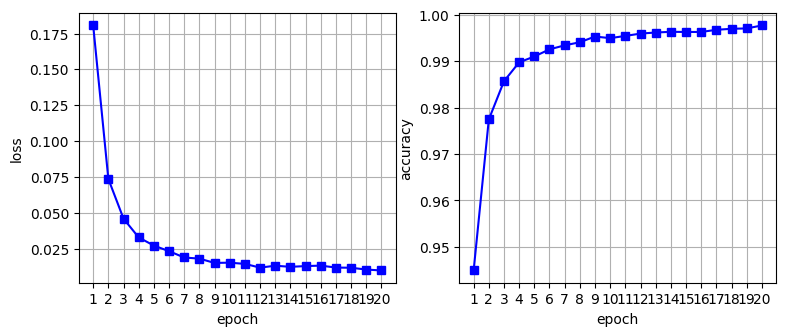

In [ ]:
H = M.fit(x_train, y_train, batch_size=16, epochs=20, verbose=0)

fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');

In [ ]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.1817
Precisión: 97.9%




Ejercicio: realiza un experimento similar al de MNIST con Fashion-MNIST


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
keras.utils.set_random_seed(23)

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [ ]:
M = keras.Sequential([keras.Input(shape=(input_dim,)),
 keras.layers.Dense(800, activation='relu'),
 keras.layers.Dense(num_classes, activation='softmax')])
M.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


In [ ]:
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
H = M.fit(x_train, y_train, batch_size=16, epochs=20, verbose=0)

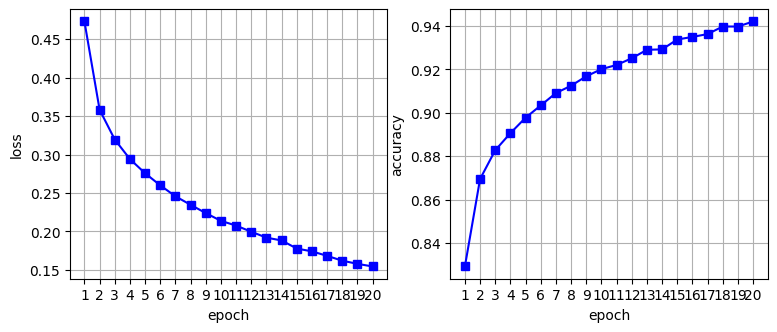

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.set_xticks(xx); ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.set_xticks(xx); ax.plot(xx, H.history['accuracy'], color='b', marker='s');

In [ ]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.4531
Precisión: 87.7%


Ejercicio: realiza un experimento similar al de MNIST con Fashion-MNIST
Inicialización: librerías y semilla para la generación de números aleatorios


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import keras
keras.utils.set_random_seed(23)

In [10]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f'Lectura: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
input_dim = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(-1, input_dim).astype("float32")
x_test = x_test.reshape(-1, input_dim).astype("float32")
print(f'Reformato 1: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')
x_train_max = np.max(x_train)
x_train /= x_train_max
x_test /= x_train_max
print(f'Normalización [0,1]: max = {x_train_max}')
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(f'Reformato 2: train {x_train.shape} {y_train.shape} test {x_test.shape} {y_test.shape}')

Lectura: train (60000, 28, 28) (60000,) test (10000, 28, 28) (10000,)
Reformato 1: train (60000, 784) (60000,) test (10000, 784) (10000,)
Normalización [0,1]: max = 255.0
Reformato 2: train (60000, 784) (60000, 10) test (10000, 784) (10000, 10)


In [11]:
M = keras.Sequential([keras.Input(shape=(input_dim,)),
  keras.layers.Dense(800, activation='relu'),
  keras.layers.Dense(num_classes, activation='softmax')])
M.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 800)                 │         628,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print(f'Número de parámetros de la capa oculta: {784*800 + 800}')
print(f'Número de parámetros de la capa de salida: {800*10 + 10}')

Número de parámetros de la capa oculta: 628000
Número de parámetros de la capa de salida: 8010


In [13]:
M.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [15]:
H = M.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8890 - loss: 0.3027
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8984 - loss: 0.2815
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9004 - loss: 0.2685
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9071 - loss: 0.2552
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9126 - loss: 0.2398
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9134 - loss: 0.2320
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9173 - loss: 0.2243
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9225 - loss: 0.2106
Epoch 9/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9245 - loss: 0.2050
Epoch 10/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9277 - loss: 0.1975
Epoch 11/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9298 - loss: 0.1929
Epoch 12/20
3750/3750 ━━

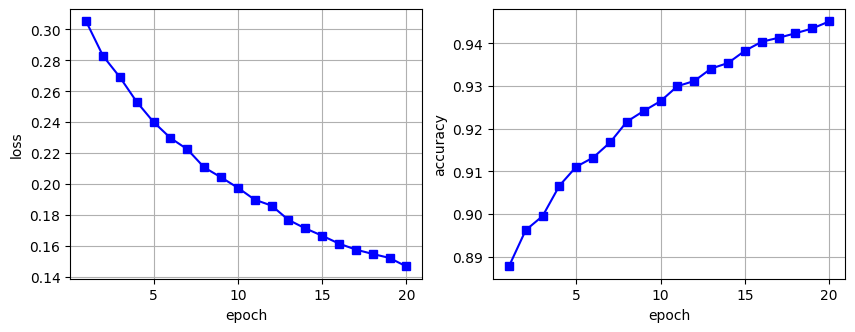

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5))
xx = np.arange(1, len(H.history['loss'])+1)
ax = axes[0]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('loss')
ax.plot(xx, H.history['loss'], color='b', marker='s')
ax = axes[1]; ax.grid(); ax.set_xlabel('epoch'); ax.set_ylabel('accuracy')
ax.plot(xx, H.history['accuracy'], color='b', marker='s');


In [17]:
score = M.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]:.4}\nPrecisión: {score[1]:.1%}')

Loss: 0.5539
Precisión: 86.7%
